In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Q2 Salary_hike -> Build a prediction model for Salary_hike

In [279]:
df = pd.read_csv(r"D:\ExcelR\Data Science\Assignments\Simple Linear Regression\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [280]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [281]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

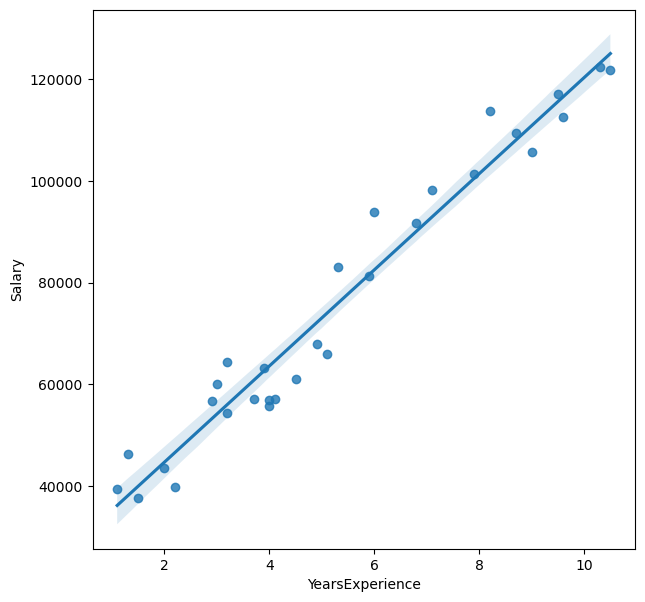

In [282]:
sns.regplot(x=df['YearsExperience'], y=df['Salary'])

<AxesSubplot:>

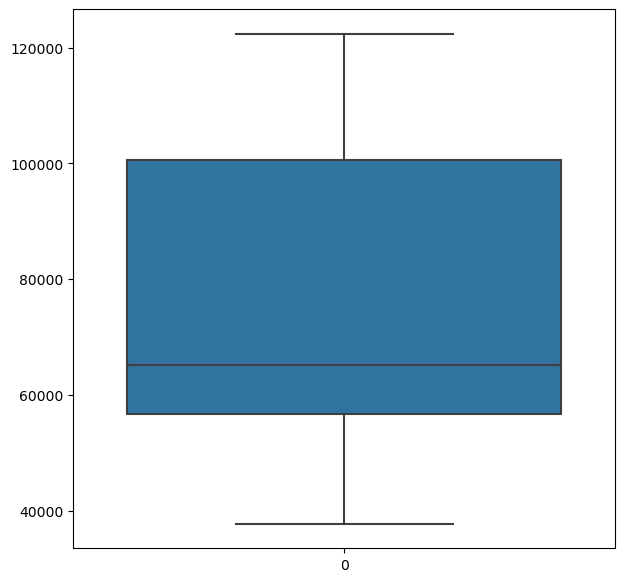

In [283]:
sns.boxplot(df['Salary'])

<AxesSubplot:>

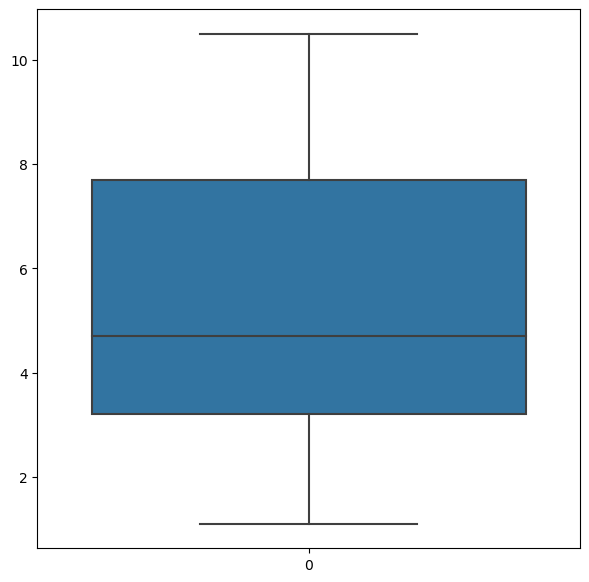

In [284]:
sns.boxplot(df['YearsExperience'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

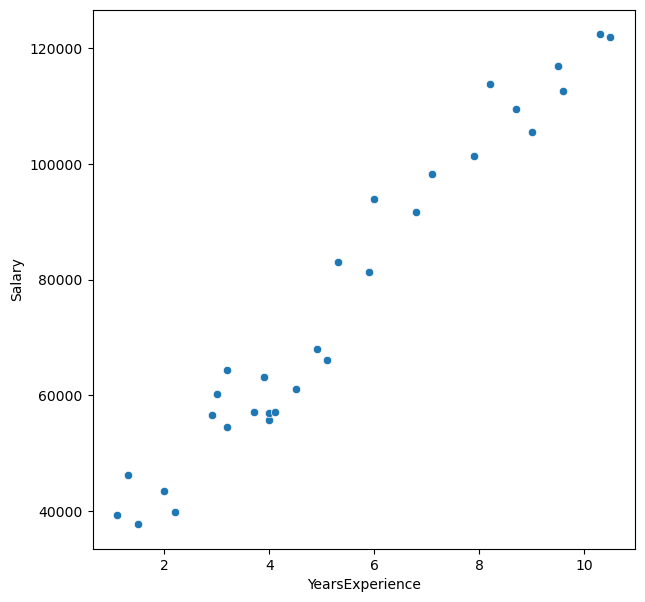

In [285]:
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])

### We can see that there are no outliers

In [286]:
def plot_graphs(f1, f2):
    fig, ax = plt.subplots(2, 2)
    sns.histplot(f1, bins=10, kde=True, ax=ax[0, 0])
    sm.qqplot(f1, line='r', ax=ax[0, 1])
    sns.histplot(f2, bins=10, kde=True, ax=ax[1, 0])
    sm.qqplot(f2, line='r', ax=ax[1, 1])
    ax[0, 0].set_title('Salary Histogram')
    ax[0, 1].set_title('Salary QQ Plot')
    ax[1, 0].set_title('Years of Experience Histogram')
    ax[1, 1].set_title('Years of Experience QQ Plot')
    plt.rcParams['figure.figsize'] = (7, 7)
    plt.tight_layout()

In [287]:
def res_fit(predt, resid):
    plt.scatter(predt, resid, c='r')
    plt.hlines(y=0, xmin=0, xmax=130000)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

## Model without any transformation

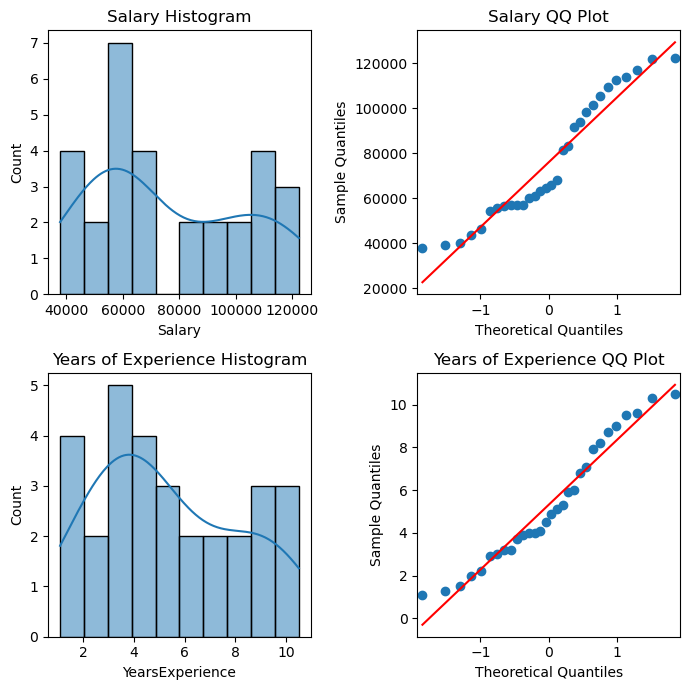

In [288]:
plot_graphs(df['Salary'], df['YearsExperience'])

### We can see from the above plots that the distrubution is not normal

In [289]:
model = LinearRegression()
model.fit(df['YearsExperience'].values.reshape(-1, 1), df['Salary'])
model.coef_, model.intercept_

(array([9449.96232146]), 25792.20019866871)

In [290]:
pred = model.predict(df['YearsExperience'].values.reshape(-1, 1))
pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [291]:
score = model.score(df[['YearsExperience']], df['Salary'])
score

0.9569566641435086

In [292]:
residuals = pred - df['Salary']
residuals

0     -3155.841248
1     -8127.848783
2      2236.143681
3      1167.124842
4      6691.117306
5     -3444.909069
6     -6007.912837
7      1587.079627
8     -8412.920373
9      3568.060788
10     -570.946748
11     7798.049484
12     6635.049484
13     7456.045717
14     7206.030645
15     4159.015574
16     7958.008038
17    -7210.999498
18      183.977895
19   -11448.025873
20    -1686.056015
21    -5386.067319
22     -855.097462
23   -10530.108765
24    -1424.127605
25     5259.861092
26    -1402.157748
27     3876.838485
28      735.812110
29     3144.804574
Name: Salary, dtype: float64

In [293]:
rmse = np.sqrt(np.mean(residuals**2))
rmse

5592.043608760662

#### Residual vs Fitted values

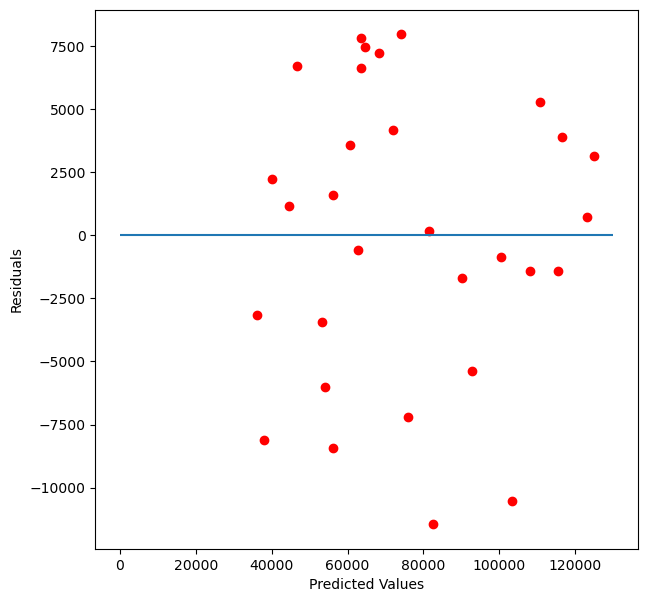

In [294]:
res_fit(pred, residuals)

### Checking for normal distribution of residuals

<AxesSubplot:xlabel='Salary', ylabel='Count'>

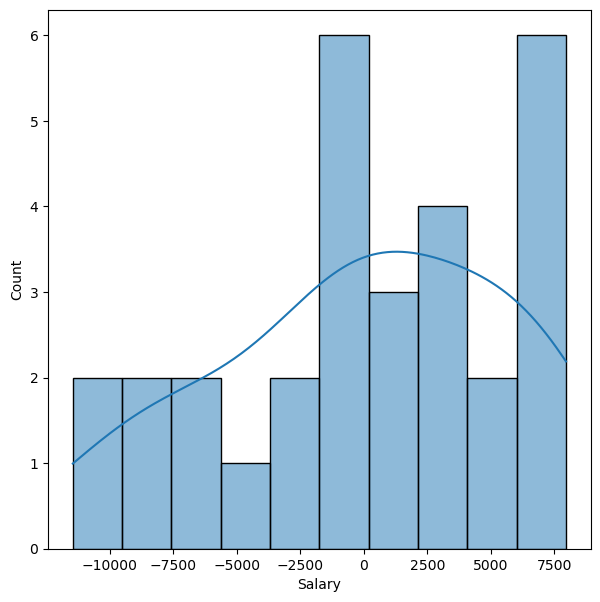

In [295]:
sns.histplot(residuals, bins=10, kde=True)

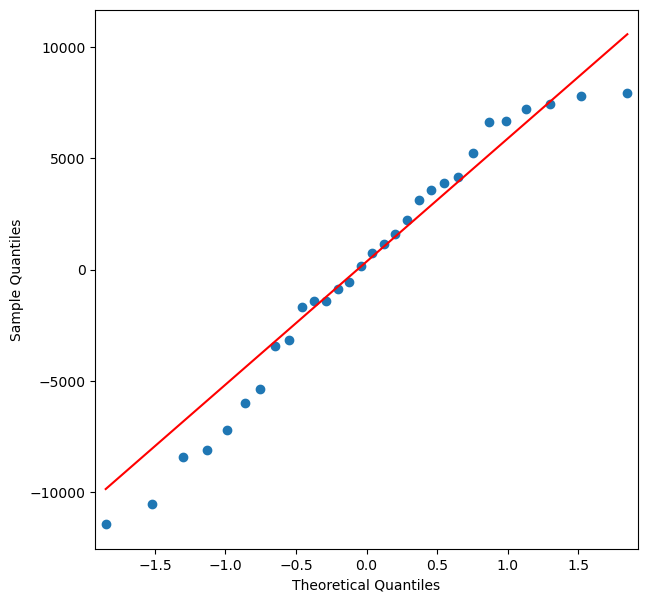

In [296]:
sm.qqplot(residuals, line='q')
plt.show()

### We can see that the residuals plot is not normally distributed

## We can do transformation and see if we get better R-squared value and RMSE 

### Applying log transfromation

In [297]:
df['Salary_lg'] = np.log(df['Salary'])
df['YearsExperience_lg'] = np.log(df['YearsExperience'])

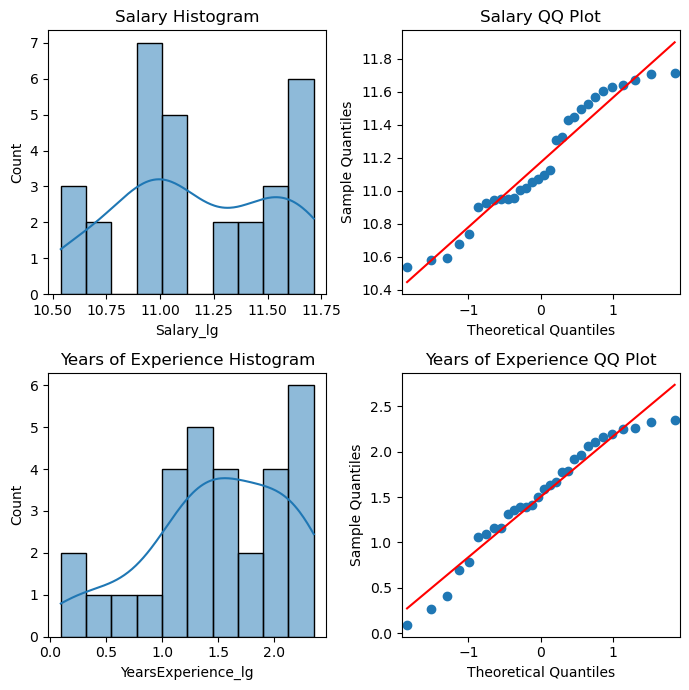

In [298]:
plot_graphs(df['Salary_lg'], df['YearsExperience_lg'])

In [299]:
model1 = LinearRegression()
model1.fit(df[['YearsExperience_lg']], df['Salary_lg'])
pred1 = model1.predict(df[['YearsExperience_lg']])
np.exp(pred1)

array([ 32261.05229288,  35437.12242934,  38405.29394206,  45145.84250168,
        47630.38898117,  55631.51847825,  56701.77999123,  58796.47978153,
        58796.47978153,  63795.78816961,  65711.74172324,  66653.56169155,
        66653.56169155,  67585.12576248,  71215.67958453,  74707.40867102,
        76406.35077821,  78076.35709899,  82927.67149175,  83714.80918813,
        89816.49987019,  92022.70079277,  97714.34557041,  99783.03869892,
       103158.601018  , 105143.20764788, 108387.62095086, 109027.44999522,
       113427.05525134, 114659.82246227])

In [300]:
residuals1 = np.exp(pred1) - df['Salary']
residuals1

0     -7081.947707
1    -10767.877571
2       674.293942
3      1620.842502
4      7739.388981
5     -1010.481522
6     -3448.220009
7      4351.479782
8     -5648.520218
9      6606.788170
10     2493.741723
11    10859.561692
12     9696.561692
13    10504.125762
14    10104.679585
15     6769.408671
16    10377.350778
17    -5011.642901
18     1564.671492
19   -10225.190812
20    -1921.500130
21    -6250.299207
22    -3587.654430
23   -14028.961301
24    -6272.398982
25     -438.792352
26    -8581.379049
27    -3607.550005
28    -8963.944749
29    -7212.177538
Name: Salary, dtype: float64

In [301]:
score1 = model1.score(df[['YearsExperience_lg']], df['Salary_lg'])
score1

0.905215072581715

In [302]:
rmse1 = np.sqrt(np.mean(residuals1**2))
rmse1

7219.716974372806

### Residuals vs Fitted values

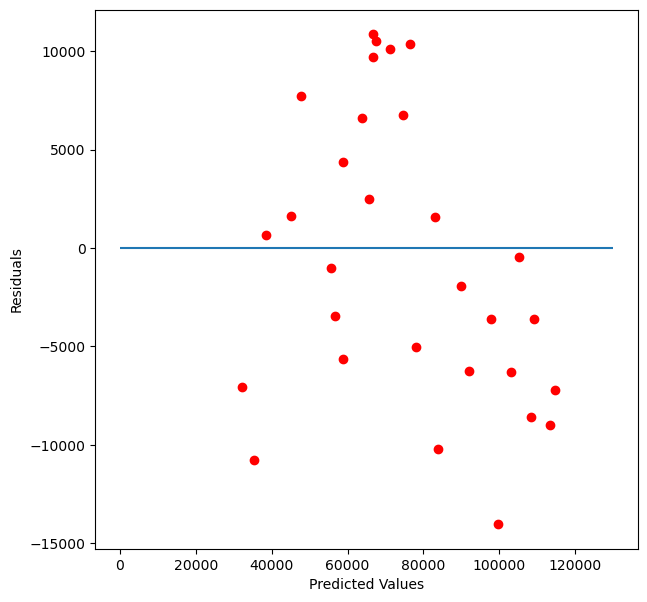

In [303]:
res_fit(np.exp(pred1), residuals1)

### Checking for normal distribution of residuals

<AxesSubplot:xlabel='Salary', ylabel='Density'>

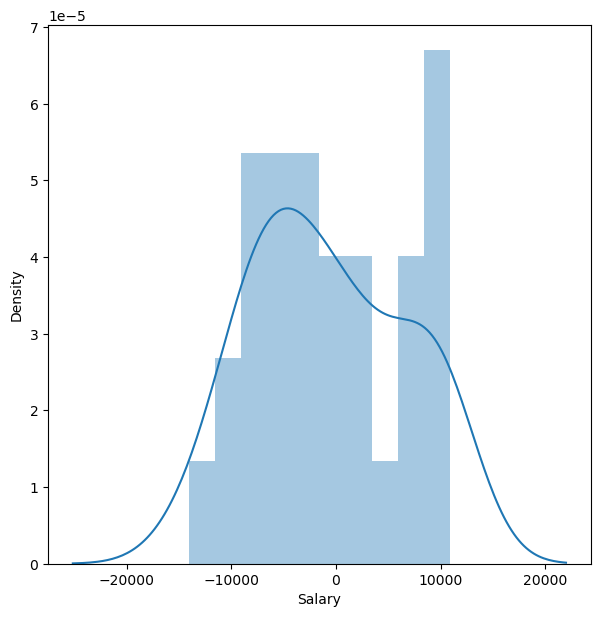

In [304]:
sns.distplot(residuals1, kde=True, bins=10)

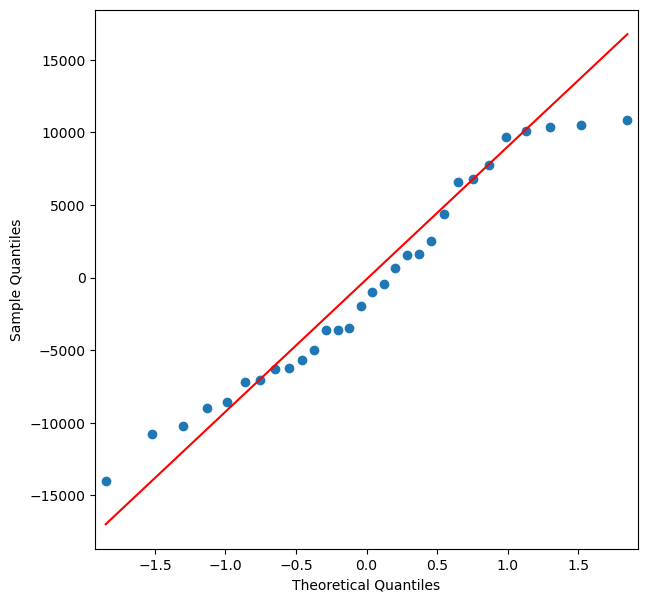

In [305]:
sm.qqplot(residuals1, line='q')
plt.show()

### Applying quadratic transformation

In [306]:
df = df[['YearsExperience', 'Salary']]
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [307]:
df['Salary_sq'] = df['Salary']**2
df['YearsExperience_sq'] = df['YearsExperience']**2

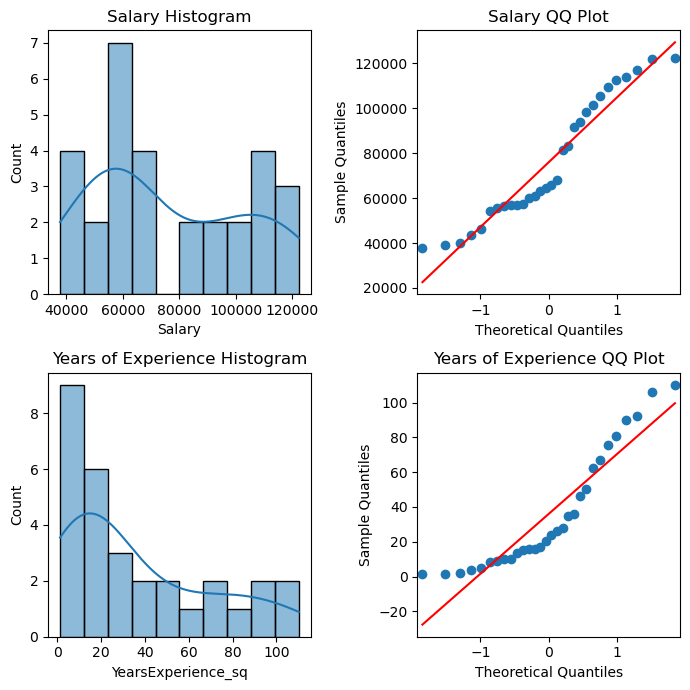

In [308]:
plot_graphs(df['Salary'], df['YearsExperience_sq'])

In [320]:
model2 = LinearRegression()
model2.fit(df[['YearsExperience_sq', 'YearsExperience']], df['Salary'])
pred2 = model2.predict(df[['YearsExperience_sq', 'YearsExperience']])
pred2

array([ 36419.97995933,  38279.7051688 ,  40140.74178358,  44799.07071874,
        46664.69725209,  53204.7174356 ,  54140.31743855,  56012.50099842,
        56012.50099842,  60698.69729633,  62575.47077478,  63514.34929099,
        63514.34929099,  64453.55565853,  68213.65964195,  71979.00924659,
        73863.65115687,  75749.60447246,  81415.33285105,  82360.76839379,
        89936.05538347,  92782.19755149, 100386.33545789, 103243.29671968,
       108011.45584918, 110876.2855428 , 115657.55872536, 116614.79691585,
       123324.64408643, 125244.69393997])

In [321]:
score2 = model2.score(df[['YearsExperience_sq', 'YearsExperience']], df['Salary'])
score2

0.956975168321065

In [323]:
residuals2 = pred2 - df['Salary']
residuals2

0     -2923.020041
1     -7925.294831
2      2409.741784
3      1274.070719
4      6773.697252
5     -3437.282564
6     -6009.682561
7      1567.500998
8     -8432.499002
9      3509.697296
10     -642.529225
11     7720.349291
12     6557.349291
13     7372.555659
14     7102.659642
15     4041.009247
16     7834.651157
17    -7338.395528
18       52.332851
19   -11579.231606
20    -1801.944617
21    -5490.802449
22     -915.664542
23   -10568.703280
24    -1419.544151
25     5294.285543
26    -1311.441275
27     3979.796916
28      933.644086
29     3372.693940
Name: Salary, dtype: float64

In [324]:
rmse2 = np.sqrt(np.mean(residuals2**2))
rmse2

5590.8414796832885

### Residuals vs Fitted values

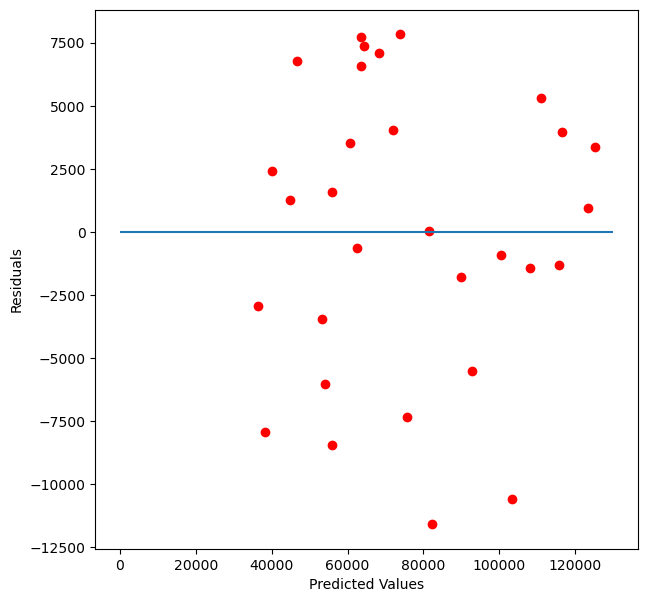

In [325]:
res_fit(pred2, residuals2)

### Checking for normal distribution of residuals

<AxesSubplot:xlabel='Salary', ylabel='Density'>

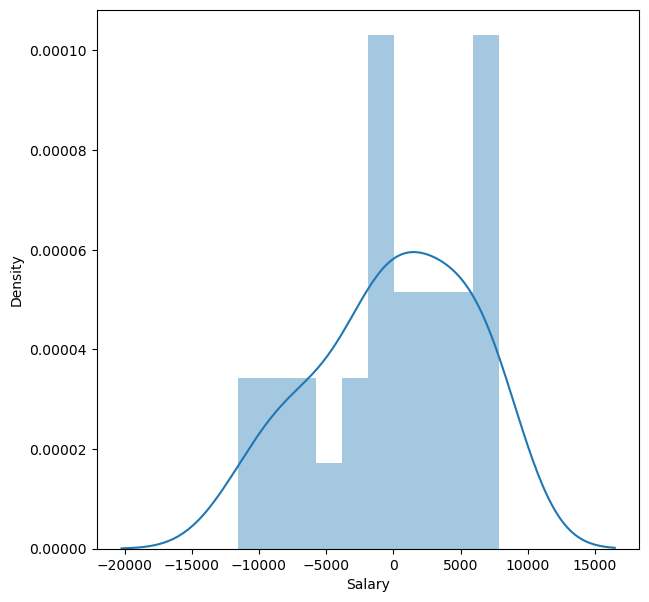

In [326]:
sns.distplot(residuals2, kde=True, bins=10)

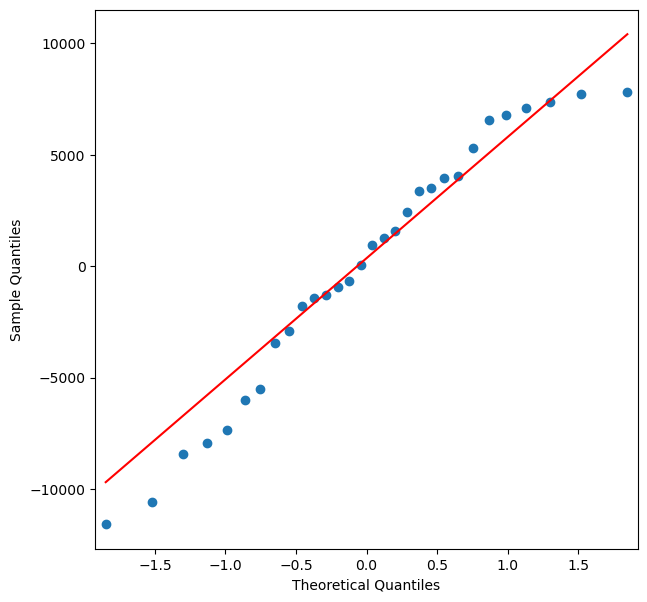

In [327]:
sm.qqplot(residuals2, line='q')
plt.show()

### Applying Sqaure root transformation

In [328]:
df = df[["YearsExperience", 'Salary']]
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [329]:
df['Salary_sqrt'] = df['Salary']**0.5

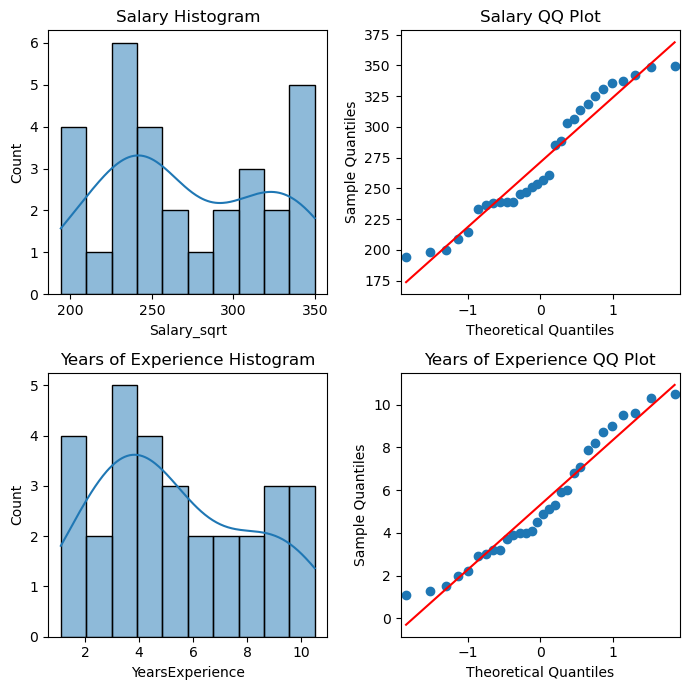

In [330]:
plot_graphs(df['Salary_sqrt'], df['YearsExperience'])

In [331]:
model3 = LinearRegression()
model3.fit(df[['YearsExperience']],df['Salary_sqrt'])
pred3 = model3.predict(df[['YearsExperience']])
pred3**2

array([ 39785.25167088,  41157.74345511,  42553.50926219,  46144.74762985,
        47621.97251689,  52975.54255146,  53763.61229353,  55357.2072948 ,
        55357.2072948 ,  59443.01864794,  61118.07272918,  61964.32752837,
        61964.32752837,  62816.40083327,  66282.87910997,  69842.45347807,
        71657.15169638,  73495.12393755,  79148.68479812,  80111.30971154,
        88021.7752245 ,  91084.20513611,  99506.6991517 , 102761.13975179,
       108301.57753284, 111695.66227   , 117468.84027951, 118640.93139855,
       127008.48739174, 129451.58422691])

In [332]:
score3 = model3.score(df[['YearsExperience']], df['Salary_sqrt'])
score3

0.949835353386529

In [333]:
residuals3 = pred3**2 - df["Salary"]
residuals3

0       442.251671
1     -5047.256545
2      4822.509262
3      2619.747630
4      7730.972517
5     -3666.457449
6     -6386.387706
7       912.207295
8     -9087.792705
9      2254.018648
10    -2099.927271
11     6170.327528
12     5007.327528
13     5735.400833
14     5171.879110
15     1904.453478
16     5628.151696
17    -9592.876062
18    -2214.315202
19   -13828.690288
20    -3716.224775
21    -7188.794864
22    -1795.300848
23   -11050.860248
24    -1129.422467
25     6113.662270
26      499.840280
27     6005.931399
28     4617.487392
29     7579.584227
Name: Salary, dtype: float64

In [334]:
rmse3 = np.sqrt(np.mean(residuals3**2))
rmse3

5926.008666359509

### Residual vs Fitted values

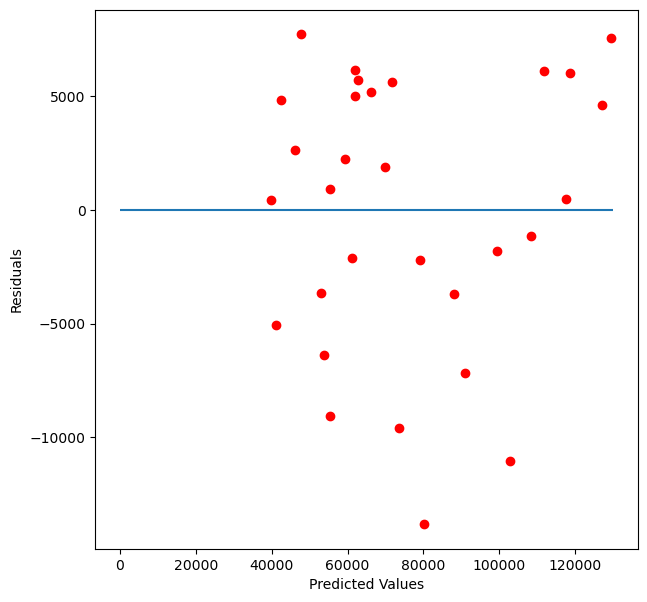

In [335]:
res_fit(pred3**2, residuals3)

### Checking for normal distribution of residuals

<AxesSubplot:xlabel='Salary', ylabel='Density'>

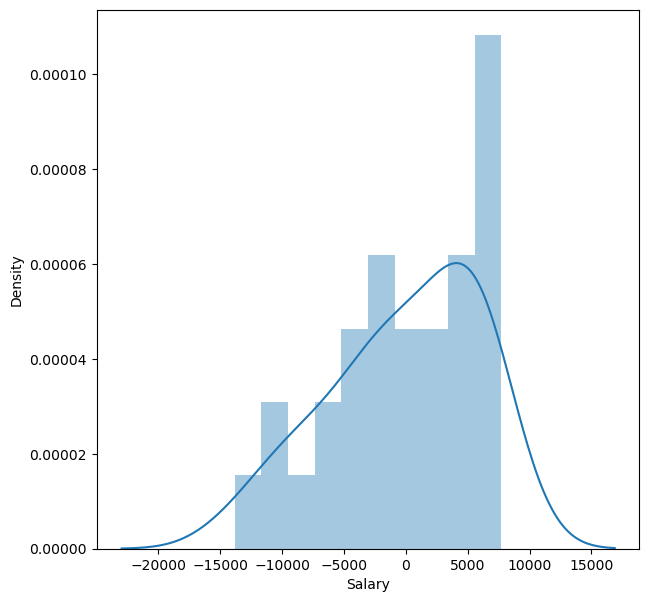

In [336]:
sns.distplot(residuals3, kde=True, bins=10)

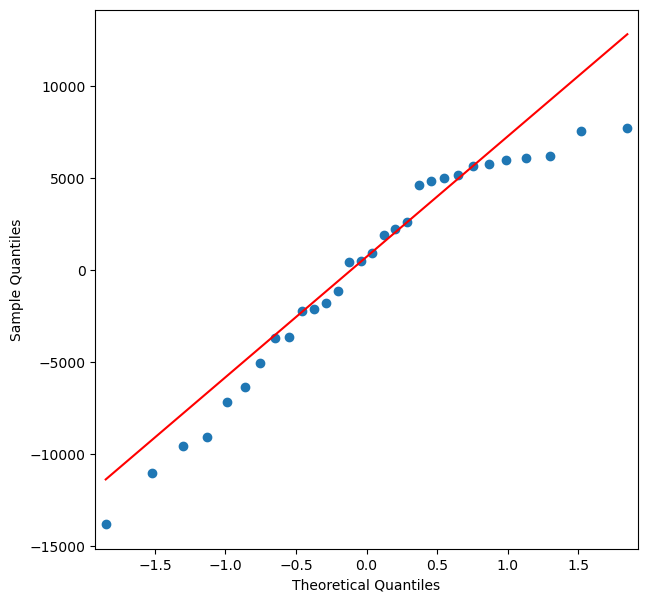

In [337]:
sm.qqplot(residuals3, line='q')
plt.show()

## Comparing RMSE and R-Squared values of different models

In [338]:
metrics_df = pd.DataFrame({'RMSE': [rmse, rmse1, rmse2, rmse3], 'R-Squared': [score, score1, score2, score3]}, index=['model (No transformation)', 
                             'model1 (Log transformation)', 
                             'model2 (Quadratic transformation)', 
                             'model3 (Sqrt tranformation)'])
metrics_df

,RMSE,R-Squared
model (No transformation),5592.043609,0.956957
model1 (Log transformation),7219.716974,0.905215
model2 (Quadratic transformation),5590.841480,0.956975
model3 (Sqrt tranformation),5926.008666,0.949835


In [339]:
metrics_df['R-Squared'].idxmax()

'model2 (Quadratic transformation)'

#### We can see that model2 has the highest R-Squared so we'll be using model2 for prediction

## Predicting values with log transformation model

In [340]:
quad_model = df[['Salary', 'YearsExperience']]
quad_model['Predicted_Salary'] = pred2
quad_model

,Salary,YearsExperience,Predicted_Salary
0,39343.0,1.1,36419.979959
1,46205.0,1.3,38279.705169
2,37731.0,1.5,40140.741784
3,43525.0,2.0,44799.070719
4,39891.0,2.2,46664.697252
5,56642.0,2.9,53204.717436
6,60150.0,3.0,54140.317439
7,54445.0,3.2,56012.500998
8,64445.0,3.2,56012.500998
9,57189.0,3.7,60698.697296
